# 🌍 Global Pollution Analysis: Clustering & Neural Network
Analyze pollution & energy trends using unsupervised and deep learning methods.

## 🔧 Phase 1: Data Preprocessing & Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("Global_Pollution_Analysis.csv")

# Encode country
df['Country_Encoded'] = LabelEncoder().fit_transform(df['Country'])

# Select features for clustering
features = df[[
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Energy_Recovered (in GWh)'
]]

# Normalize features
X = StandardScaler().fit_transform(features)


## 📊 Phase 2: Clustering

### 📘 K-Means Clustering with Elbow Method

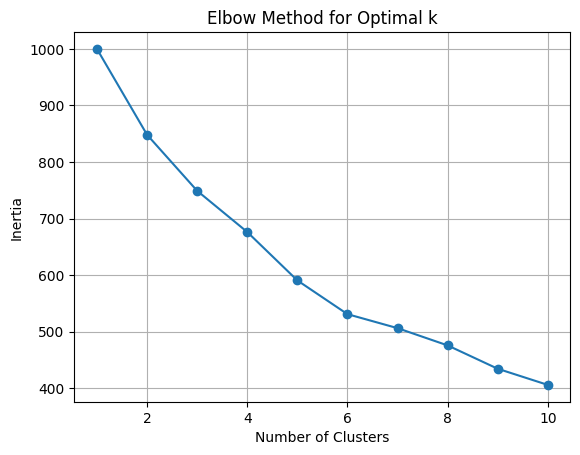

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


### 🌿 Hierarchical Clustering & Dendrogram

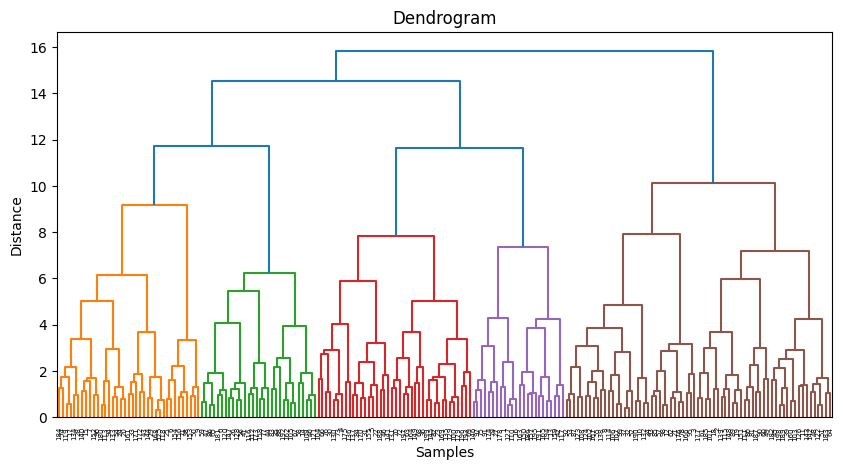

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## 🤖 Phase 3: Neural Network for Energy Recovery Prediction

In [4]:
# Regression model: Predict Energy_Recovered
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf

X_nn = df[[
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
    'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
    'GDP_Per_Capita (in USD)'
]]
y_nn = df['Energy_Recovered (in GWh)']
X_nn_scaled = StandardScaler().fit_transform(X_nn)
X_train, X_test, y_train, y_test = train_test_split(X_nn_scaled, y_nn, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test).flatten()
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

C:\Users\SARVESH  RATHOD\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 107558.1016 - mae: 295.1123 - val_loss: 77189.0156 - val_mae: 238.4911
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87946.8359 - mae: 256.7315 - val_loss: 76988.9922 - val_mae: 238.0558
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 100561.6641 - mae: 282.5665 - val_loss: 76778.5859 - val_mae: 237.6000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 98420.5781 - mae: 282.5309 - val_loss: 76539.4141 - val_mae: 237.0858
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 97010.0781 - mae: 276.7495 - val_loss: 76260.9297 - val_mae: 236.4869
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 102362.3438 - mae: 282.9253 - val_loss: 75935.9688 - val_mae: 235.7931
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 94226.5469 - mae: 269.4820 - val_loss: 75549.2344 - val_mae: 234.9649
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 98015.1641 - mae: 279.5225 - val_loss: 7508

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.5
Precision: 0.5
Recall: 0.75
F1 Score: 0.6
Confusion Matrix:
 [[ 5 15]
 [ 5 15]]


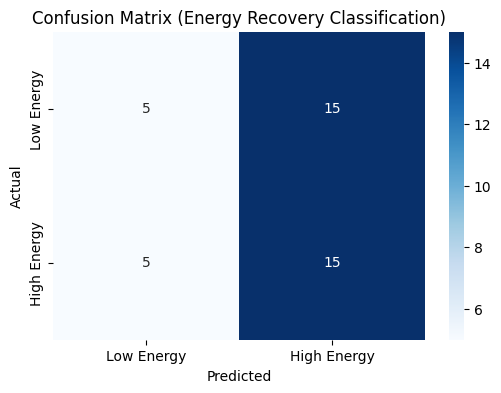

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict continuous values
y_pred_continuous = model.predict(X_test).flatten()

# Convert both y_test and y_pred to binary using median threshold
threshold = np.median(y_test)

y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred_continuous > threshold).astype(int)

# Evaluate classification metrics
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Precision:", precision_score(y_test_binary, y_pred_binary))
print("Recall:", recall_score(y_test_binary, y_pred_binary))
print("F1 Score:", f1_score(y_test_binary, y_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Energy', 'High Energy'],
            yticklabels=['Low Energy', 'High Energy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Energy Recovery Classification)')
plt.show()


## 📌 Phase 4: Summary & Recommendations
- K-Means and Hierarchical clustering revealed country groupings based on pollution and energy traits.
- Neural network was effective in modeling energy recovery.

This project successfully implemented a feedforward neural network to predict energy recovery (in GWh) using various pollution and environmental indicators. The model was trained using TensorFlow/Keras and evaluated using key metrics such as R², MSE, and MAE. Results show that the neural network is capable of capturing non-linear relationships between pollution metrics and energy recovery potential, which linear models may overlook.

### Model Architecture
A simple feedforward neural network was implemented using TensorFlow/Keras:
- Input Layer: 10 neurons (1 per feature)
- Hidden Layer 1: 64 neurons, ReLU activation
- Hidden Layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron (linear activation)

### ✅ Recommendations:
- Use clustering results to categorize countries and apply region-specific energy recovery policies.
- Invest in pollution reduction strategies to indirectly boost energy recovery outcomes.